# Problem Statement
I have build an ML model that predicts flight ticket prices based on various independent features, using a dataset of flight ticket prices from the Kaggle website. The dataset includes prices for various airlines and cities between March and June of 2019, with 10,683 records. The prediction results can be beneficial for both travelers, who can use it to make informed decisions about their travel, and for airlines, who can use it to forecast competitors' rates and adjust their pricing strategies to maximize revenue while remaining competitive.

# Importing Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





## Importing dataset

1. The data is in form of excel file we have to use pandas read_excel to load the data
2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
3. Check whether any null values are there or not. if it is present then following can be done,
4. Describe data --> which can give statistical analysis

In [29]:
train_data = pd.read_excel(r'C:\Users\ACER\Downloads\FLIGHT.xlsx')

In [30]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [31]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302



# Data Inspection

In [32]:
train_data.shape

(10683, 11)

In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [34]:
train_data.describe()   #statistical summary

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [35]:
train_data.dropna(inplace = True)   #to remove missing values (NaN or None) from the DataFrame

In [36]:
train_data.isnull().sum()          # the values are the counts of missing values in each corresponding column.

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

---

## EDA

* From description we can see that Date_of_Journey is a object data type,
  Therefore we have to convert this datatype into timestamp so as to use this column properly for prediction

  For this we require pandas **to_datetime** to convert object data type to datetime dtype.



     .dt.day method will extract only day of that date
     .dt.month method will extract only month of that date

# Feature Engineering

In [37]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day       

In [38]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [39]:
train_data["Journey_year"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.year

In [40]:
train_data.drop(["Journey_year"], axis = 1, inplace = True)

In [41]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [42]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [43]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_16052\569228883.py:5: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\ACER\AppData\Local\Temp\ipykernel_16052\569228883.py:8: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [44]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [45]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_16052\1117634591.py:5: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\ACER\AppData\Local\Temp\ipykernel_16052\1117634591.py:8: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [46]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [47]:
# Time taken by plane to reach destination is called Duration
# It is the differnce between Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
    
# strip() = to remove leading and trailing whitespaces from the string.

# split()=  it splits the string based on whitespace by default

In [48]:
a = "2h 30m 30sec".split()

In [49]:
a

['2h', '30m', '30sec']

In [50]:
len(a)

3

In [51]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [52]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [53]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [54]:
import plotly.express as px
figure=px.pie(train_data,names="Airline")
figure.update_layout(title_text='Airline Distribution')
figure.show()

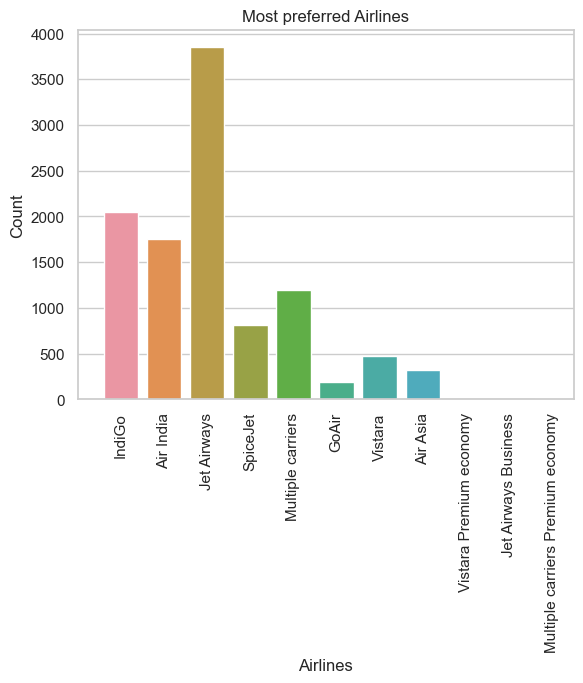

In [55]:
sns.set(style="whitegrid")
sns.countplot(x='Airline',data=train_data)
plt.title("Most preferred Airlines")
plt.ylabel("Count")
plt.xlabel("Airlines")
plt.xticks(rotation= 90)
plt.xlim(-1,10.5)
plt.show()


C:\Users\ACER\AppData\Local\Temp\ipykernel_16052\941059414.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Price', ylabel='Density'>

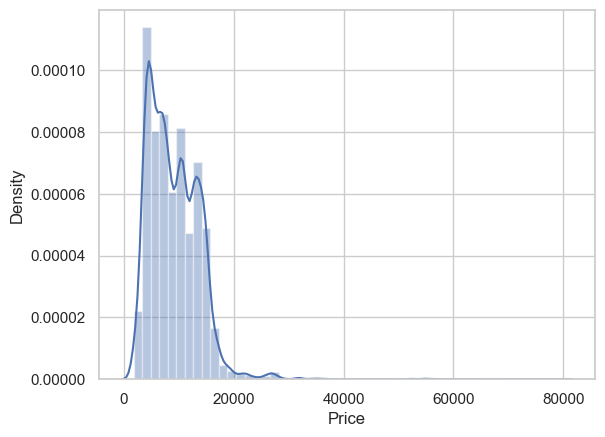

In [56]:
sns.distplot(train_data["Price"])

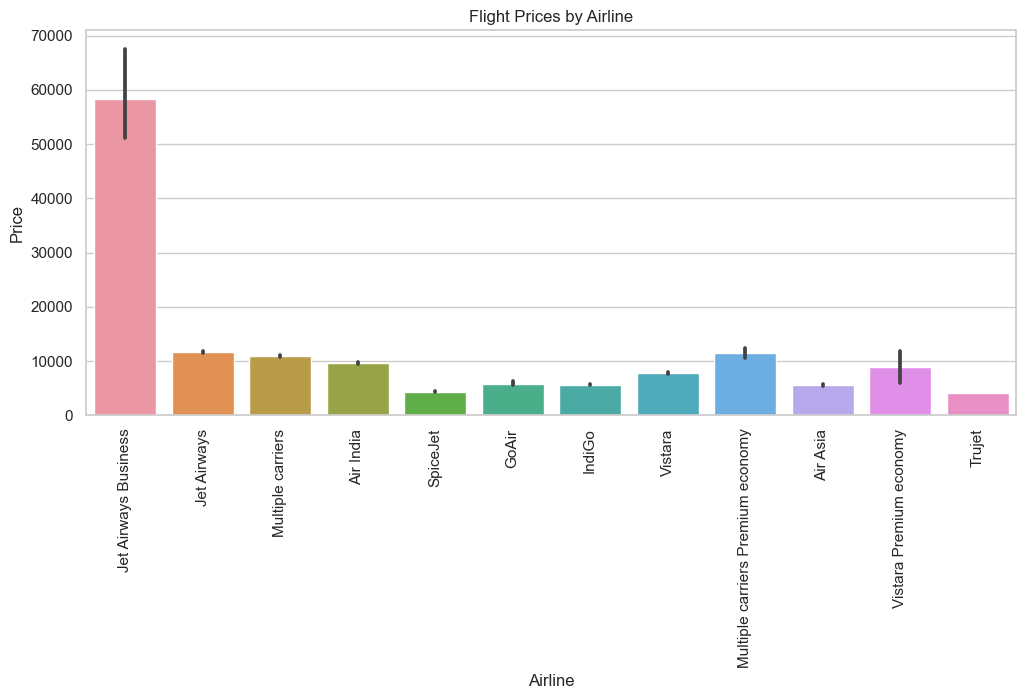

In [57]:
# Bar chart with Seaborn
plt.figure(figsize=(12, 5))
sns.barplot(x='Airline', y='Price', data=train_data.sort_values("Price", ascending=False))
plt.xlabel('Airline')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.title('Flight Prices by Airline')
plt.show()

# Insights

* Most preferred Airline is "Jet Airways"
* From all the total flight tickets sold, Jet Airways has the highest share followed by Indigo.

In [58]:
airlines = train_data.groupby('Airline').Price.max()
airlines_df= airlines.to_frame().sort_values('Price',ascending=False)[0:10]
airlines_df

,Price
Airline,
Jet Airways Business,79512
Jet Airways,54826
Multiple carriers,36983
Air India,31945
SpiceJet,23267
GoAir,22794
IndiGo,22153
Vistara,21730
Multiple carriers Premium economy,14629


---

## Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,
1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case



* lable Encoding creates a single column to convert categorical into numeric .

* Onehot Encoding creates muliple columns per category  to convert categorical into numeric .

In [59]:
train_data["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



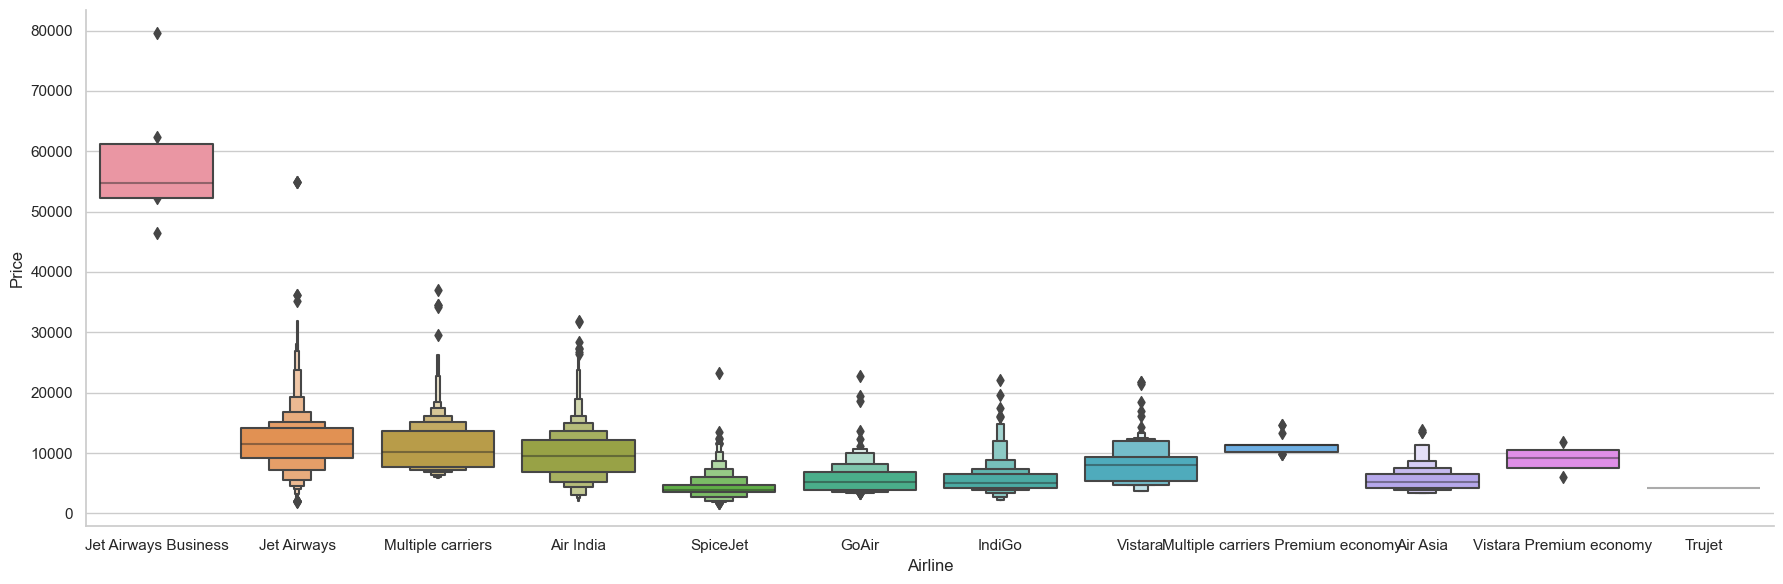

In [60]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [61]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [62]:
train_data["Source"].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



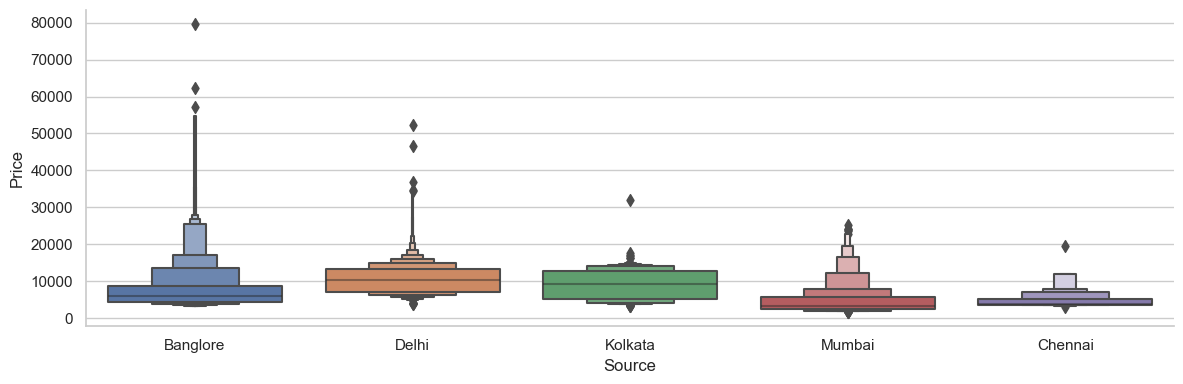

In [63]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [64]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [65]:
train_data["Destination"].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

<Axes: >

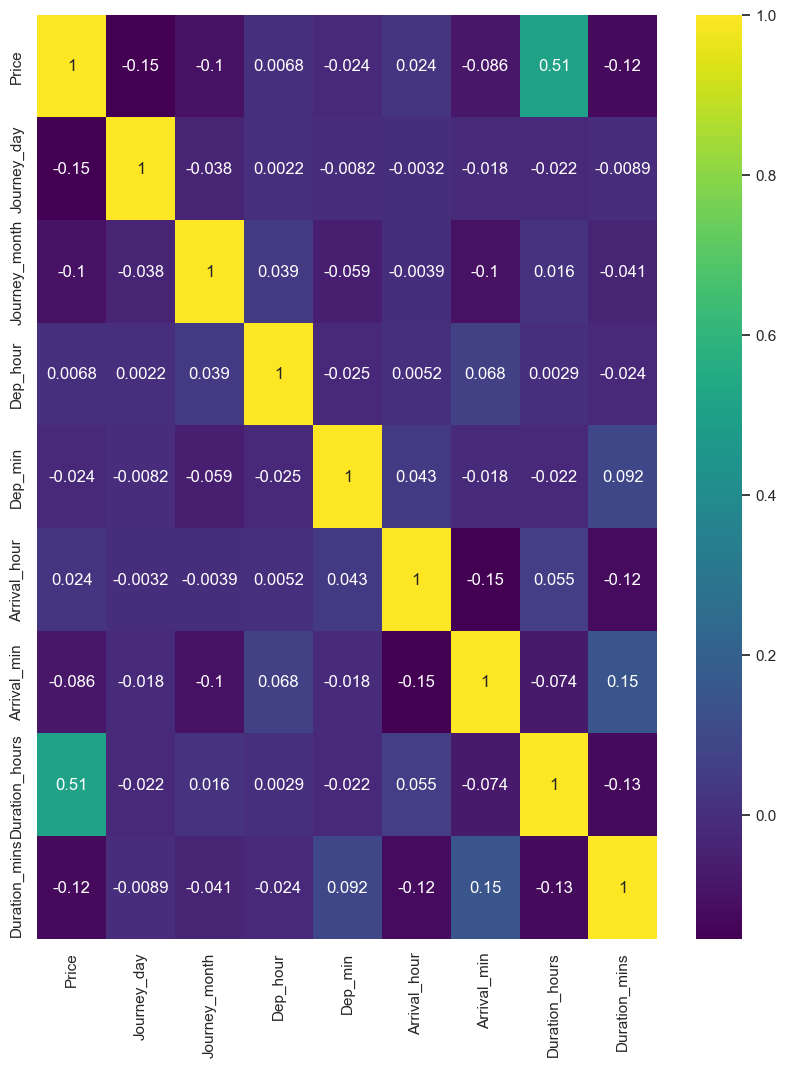

In [66]:
plt.figure(figsize=(10,12))
sns.heatmap(train_data[train_data.select_dtypes(exclude='object').columns].corr(),annot=True,cmap='viridis')

C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



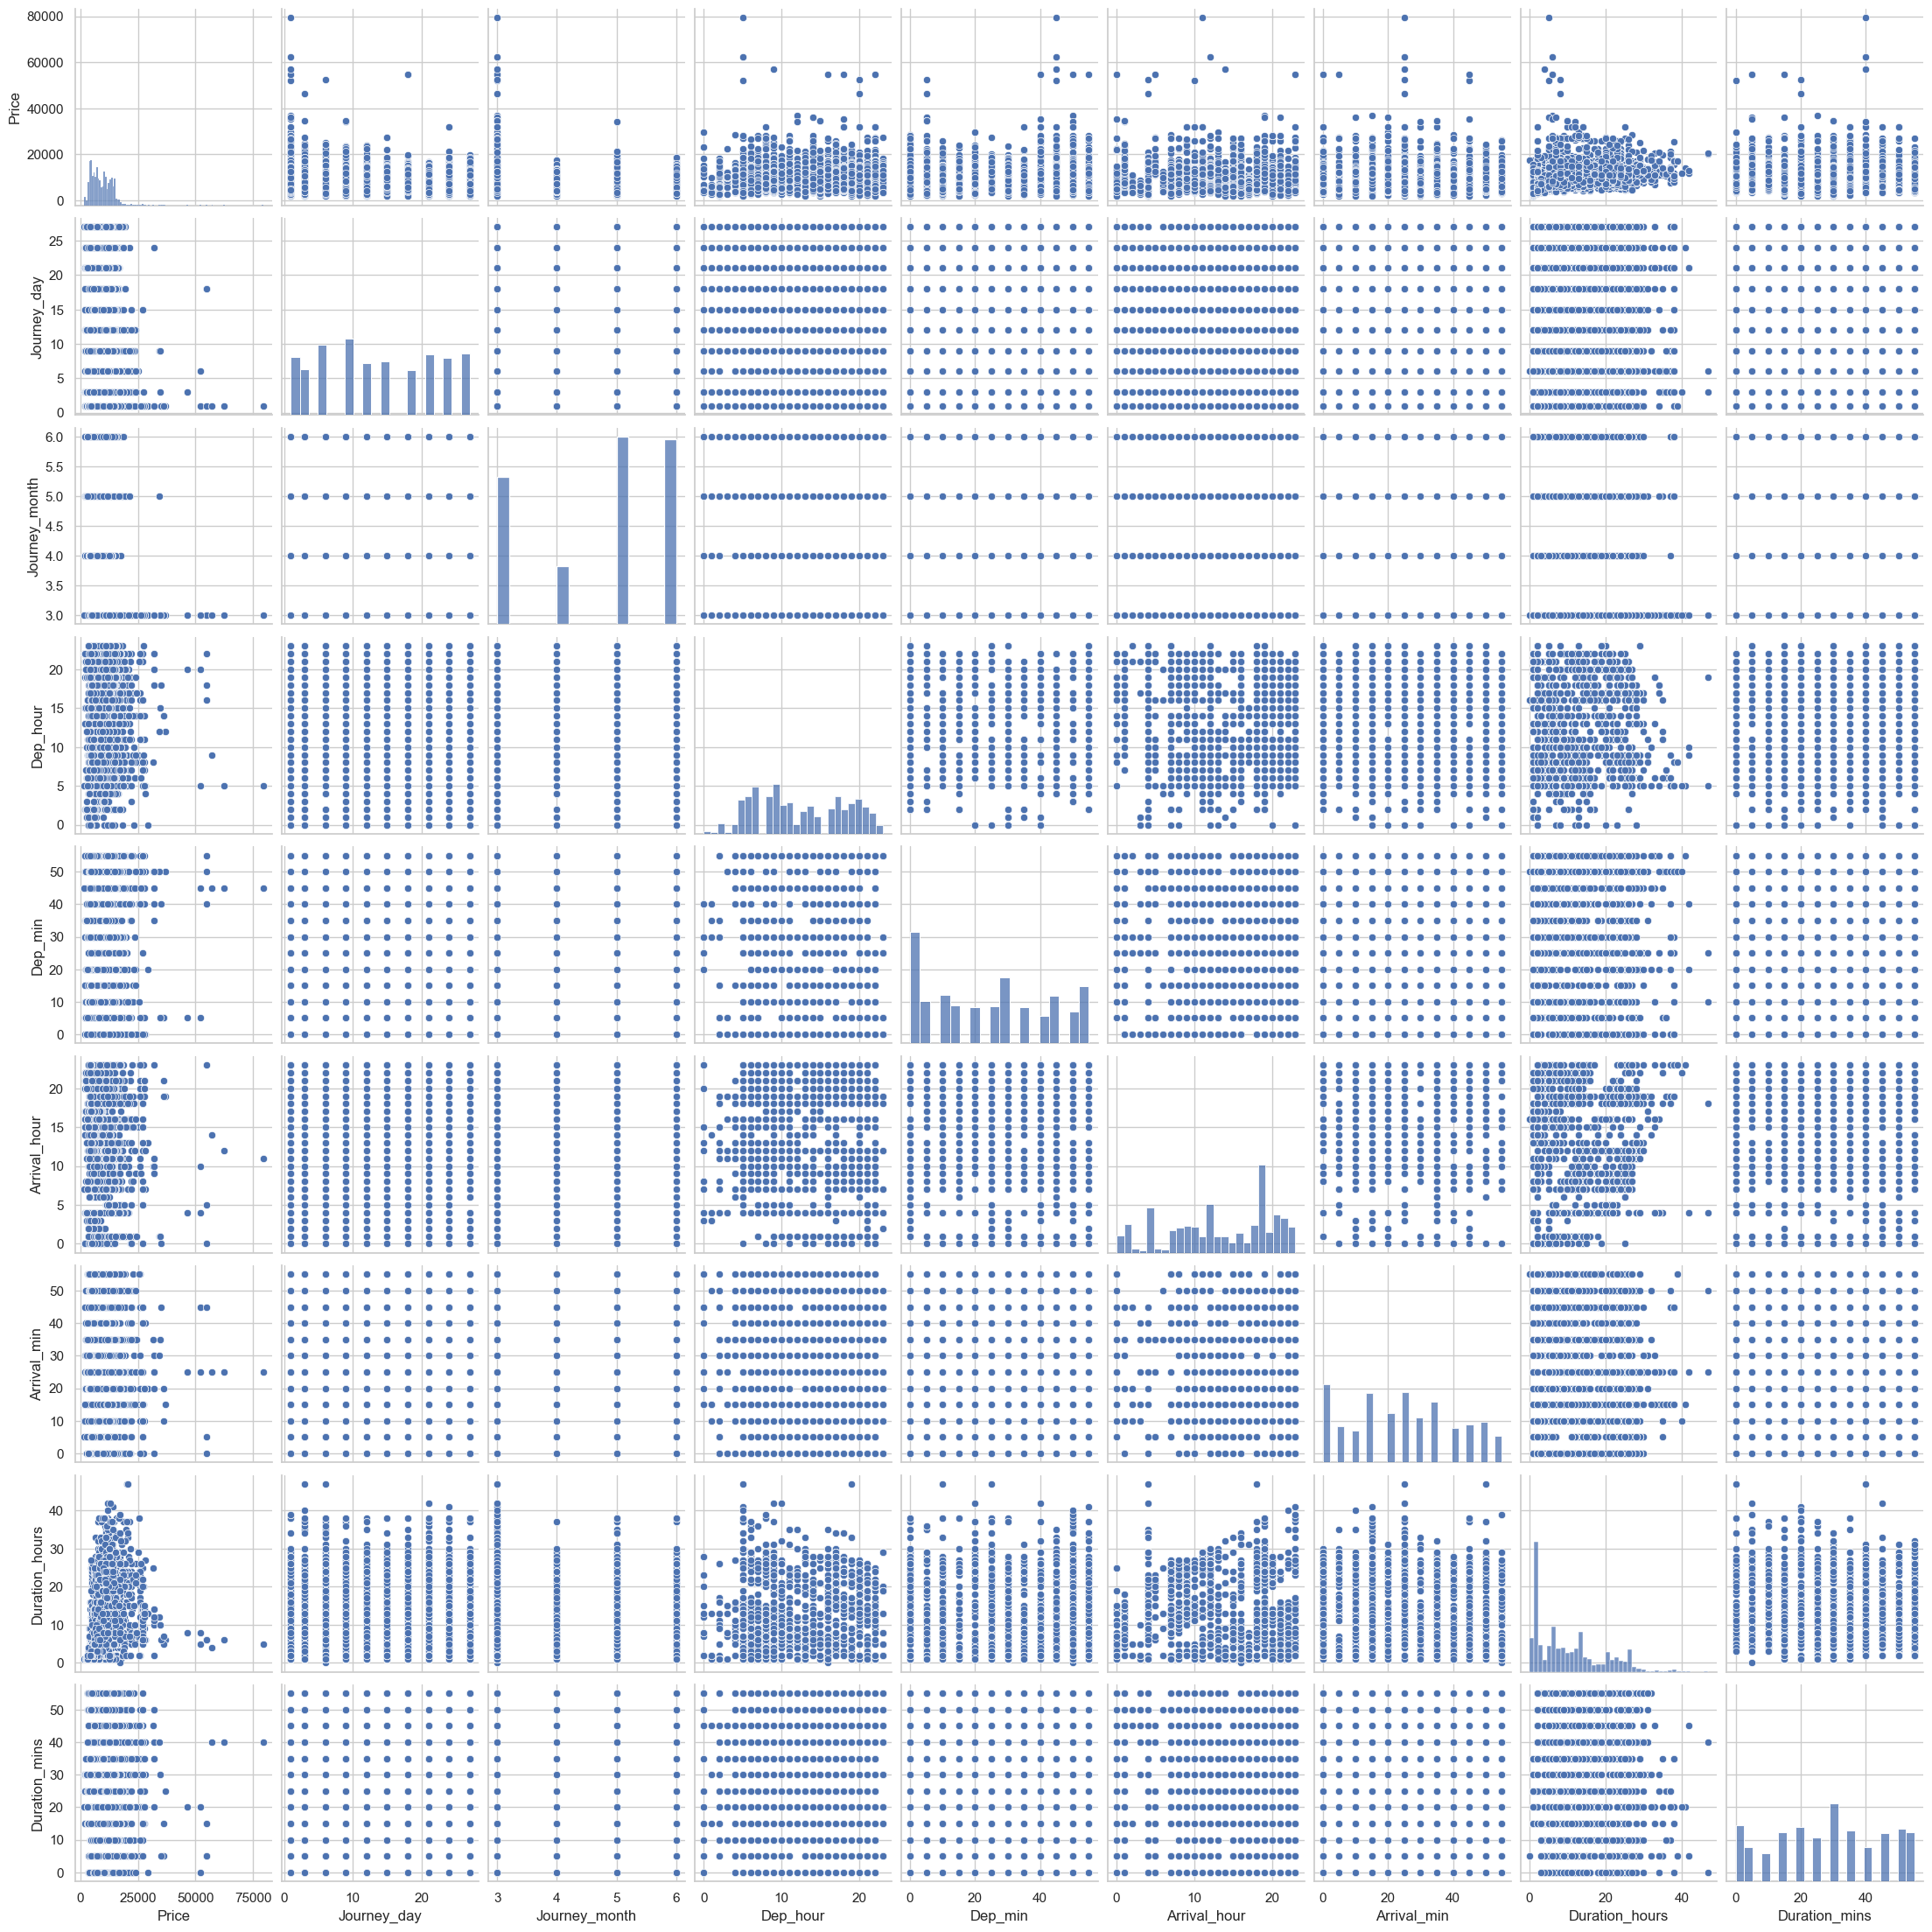

In [67]:
sns.pairplot(train_data)

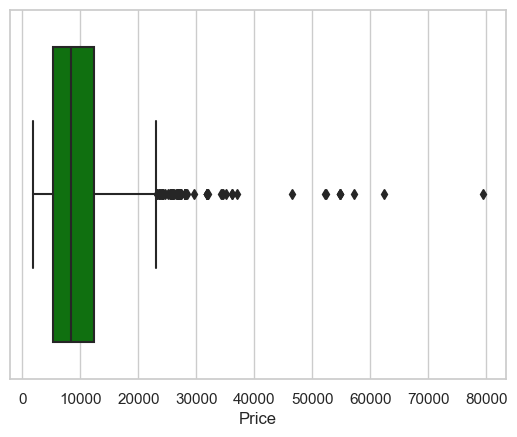

In [68]:
sns.boxplot(x=train_data['Price'],color="Green")
plt.show()

In [69]:
Q1 = train_data['Price'].quantile(0.25)
Q3 = train_data['Price'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR
outliers = ((train_data['Price'] < (Q1 - 1.5 * IQR)) | (train_data['Price'] > (Q3 + 1.5 * IQR)))

# Remove outliers
new_data = train_data[~outliers]


In [70]:
new_data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


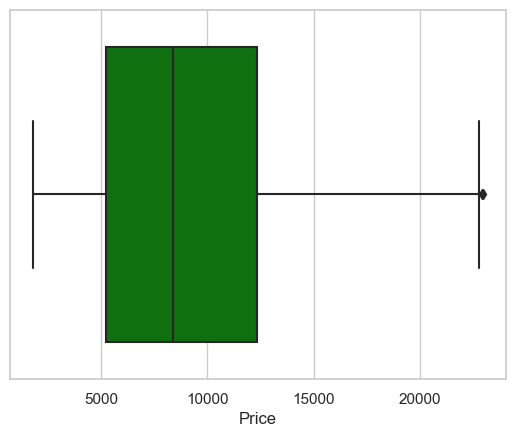

In [71]:
sns.boxplot(x=new_data['Price'],color="Green")
plt.show()

In [72]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = new_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)


Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [73]:
new_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10588, dtype: object

In [74]:
#Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

new_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_16052\3444131206.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [75]:
#No. of stops

new_data['Total_Stops'].value_counts()

Total_Stops
1 stop      5550
non-stop    3488
2 stops     1504
3 stops       45
4 stops        1
Name: count, dtype: int64

In [76]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

new_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_16052\1626357948.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
new_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [78]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data = pd.concat([new_data, Airline, Source,Destination], axis = 1)

In [79]:
data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [80]:
data.head()


,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,2.0,50.0,...,False,False,False,False,False,False,False,False,False,True
1,2.0,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7.0,25.0,...,False,False,False,True,False,False,False,False,False,False
2,2.0,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,19.0,0.0,...,False,False,True,False,False,True,False,False,False,False
3,1.0,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,...,False,False,False,True,False,False,False,False,False,False
4,1.0,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,...,False,False,False,False,False,False,False,False,False,True


In [81]:
data.shape

(10682, 30)

In [82]:


print("Data Info")
print("-"*75)
print(data.info())

print()
print()

print("Null values :")
print("-"*75)
data.dropna(inplace = True)
print(data.isnull().sum())


print()
print()

print("Shape of test data : ", data.shape)



Data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10511
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                10588 non-null  float64
 1   Price                                      10588 non-null  float64
 2   Journey_day                                10588 non-null  float64
 3   Journey_month                              10588 non-null  float64
 4   Dep_hour                                   10588 non-null  float64
 5   Dep_min                                    10588 non-null  float64
 6   Arrival_hour                               10588 non-null  float64
 7   Arrival_min                                10588 non-null  float64
 8   Duration_hours                             10588 non-null  float64
 9   Duration_mins

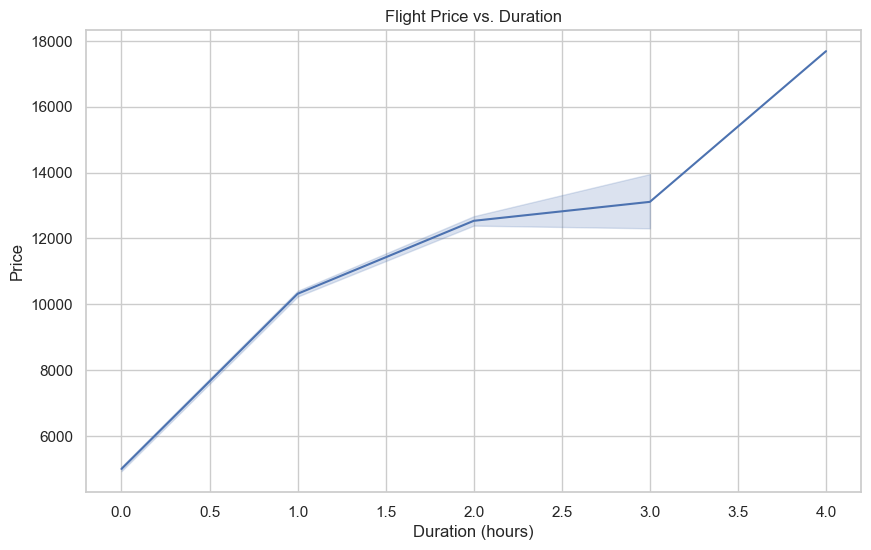

In [83]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Total_Stops',y='Price',data=data)
plt.xlabel('Duration (hours)')
plt.ylabel('Price')
plt.title('Flight Price vs. Duration')
plt.grid(True)
plt.show()

In [84]:
data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [85]:
correlation = data.corr()

# Apply background color based on correlation value
correlation.style.applymap(lambda x: 'background-color: yellow' if x > 0.65 else '')

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,0.667691,-0.004563,0.061148,-0.061425,-0.004909,0.040294,-0.108091,0.741702,-0.137267,0.272715,-0.059716,-0.302120,0.215696,nan,0.118141,0.009259,-0.274258,0.002566,-0.119905,-0.020446,-0.234642,0.494422,0.035681,-0.264655,0.494422,-0.447364,-0.264655,-0.234642,-0.022699
Price,0.667691,1.000000,-0.118512,-0.050854,0.006989,-0.052967,0.037664,-0.097244,0.574937,-0.139088,0.061651,-0.101957,-0.388602,0.451589,nan,0.161747,0.021723,-0.325659,-0.011364,-0.058922,0.000267,-0.195045,0.333034,0.037863,-0.258397,0.333034,-0.339820,-0.258397,-0.195045,0.105618
Journey_day,-0.004563,-0.118512,1.000000,-0.055767,0.000864,-0.002804,-0.004097,-0.017911,-0.018552,-0.008980,-0.033205,-0.004692,0.001812,-0.010081,nan,0.041951,0.030702,0.019619,-0.008751,-0.015741,-0.020474,0.004485,0.095089,-0.068324,-0.016030,0.095089,-0.001505,-0.016030,0.004485,-0.047766
Journey_month,0.061148,-0.050854,-0.055767,1.000000,0.039765,-0.053879,-0.005716,-0.102113,0.019739,-0.041975,-0.046706,-0.006304,-0.055363,0.069044,nan,0.053736,-0.052167,-0.015321,-0.014460,-0.020236,-0.020204,0.003207,0.134099,0.080595,-0.040477,0.134099,0.086649,-0.040477,0.003207,-0.442390
Dep_hour,-0.061425,0.006989,0.000864,0.039765,1.000000,-0.026188,0.007830,0.067983,0.003476,-0.024704,-0.012083,-0.016454,-0.023525,0.113991,nan,-0.151343,-0.028818,-0.010352,0.000861,0.024040,-0.003392,-0.014919,-0.120114,0.156283,-0.017007,-0.120114,0.009534,-0.017007,-0.014919,-0.022577
Dep_min,-0.004909,-0.052967,-0.002804,-0.053879,-0.026188,1.000000,0.044624,-0.016943,-0.024778,0.092189,-0.046393,0.077861,-0.012660,0.020992,nan,-0.109075,-0.004500,0.094684,-0.010029,-0.077465,-0.011380,0.068411,-0.082189,-0.021979,0.038585,-0.082189,0.004849,0.038585,0.068411,0.097271
Arrival_hour,0.040294,0.037664,-0.004097,-0.005716,0.007830,0.044624,1.000000,-0.153285,0.055720,-0.117961,0.087363,0.018435,-0.072594,-0.027386,nan,0.071549,0.013511,-0.091229,0.003745,0.068898,0.000757,-0.015135,-0.005418,0.053935,-0.034847,-0.005418,-0.031542,-0.034847,-0.015135,0.001345
Arrival_min,-0.108091,-0.097244,-0.017911,-0.102113,0.067983,-0.016943,-0.153285,1.000000,-0.074908,0.150672,0.060853,0.097107,0.035203,-0.056625,nan,-0.169740,-0.001795,0.012763,-0.002759,0.069609,0.000313,-0.030608,-0.211834,0.119107,0.080273,-0.211834,0.095536,0.080273,-0.030608,0.024560
Duration_hours,0.741702,0.574937,-0.018552,0.019739,0.003476,-0.024778,0.055720,-0.074908,1.000000,-0.127993,0.261507,-0.094059,-0.346651,0.308682,nan,-0.007018,-0.002198,-0.264191,-0.008258,-0.019932,-0.016285,-0.186892,0.303298,0.125770,-0.236295,0.303298,-0.346734,-0.236295,-0.186892,-0.000927
Duration_mins,-0.137267,-0.139088,-0.008980,-0.041975,-0.024704,0.092189,-0.117961,0.150672,-0.127993,1.000000,-0.034867,0.067404,0.120198,-0.083305,nan,-0.119977,-0.006886,0.040853,-0.007638,0.042036,0.004964,-0.099224,-0.155377,0.013569,-0.017807,-0.155377,0.218954,-0.017807,-0.099224,0.083047


In [90]:
x=data.drop('Price',axis=1)
y=data['Price']

In [91]:
x

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,24.0,3.0,22.0,20.0,1.0,10.0,2.0,50.0,False,...,False,False,False,False,False,False,False,False,False,True
1,2.0,1.0,5.0,5.0,50.0,13.0,15.0,7.0,25.0,True,...,False,False,False,True,False,False,False,False,False,False
2,2.0,9.0,6.0,9.0,25.0,4.0,25.0,19.0,0.0,False,...,False,False,True,False,False,True,False,False,False,False
3,1.0,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,False,...,False,False,False,True,False,False,False,False,False,False
4,1.0,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,9.0,4.0,19.0,55.0,22.0,25.0,2.0,30.0,False,...,False,False,False,True,False,False,False,False,False,False
10679,0.0,27.0,4.0,20.0,45.0,23.0,20.0,2.0,35.0,True,...,False,False,False,True,False,False,False,False,False,False
10680,0.0,27.0,4.0,8.0,20.0,11.0,20.0,3.0,0.0,False,...,False,False,False,False,False,False,True,False,False,False
10681,0.0,1.0,3.0,11.0,30.0,14.0,10.0,2.0,40.0,False,...,False,False,False,False,False,False,False,False,False,True


In [92]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10588, dtype: float64

In [94]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size=0.2,random_state=2)


In [95]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((8470, 29), (2118, 29), (8470,), (2118,))

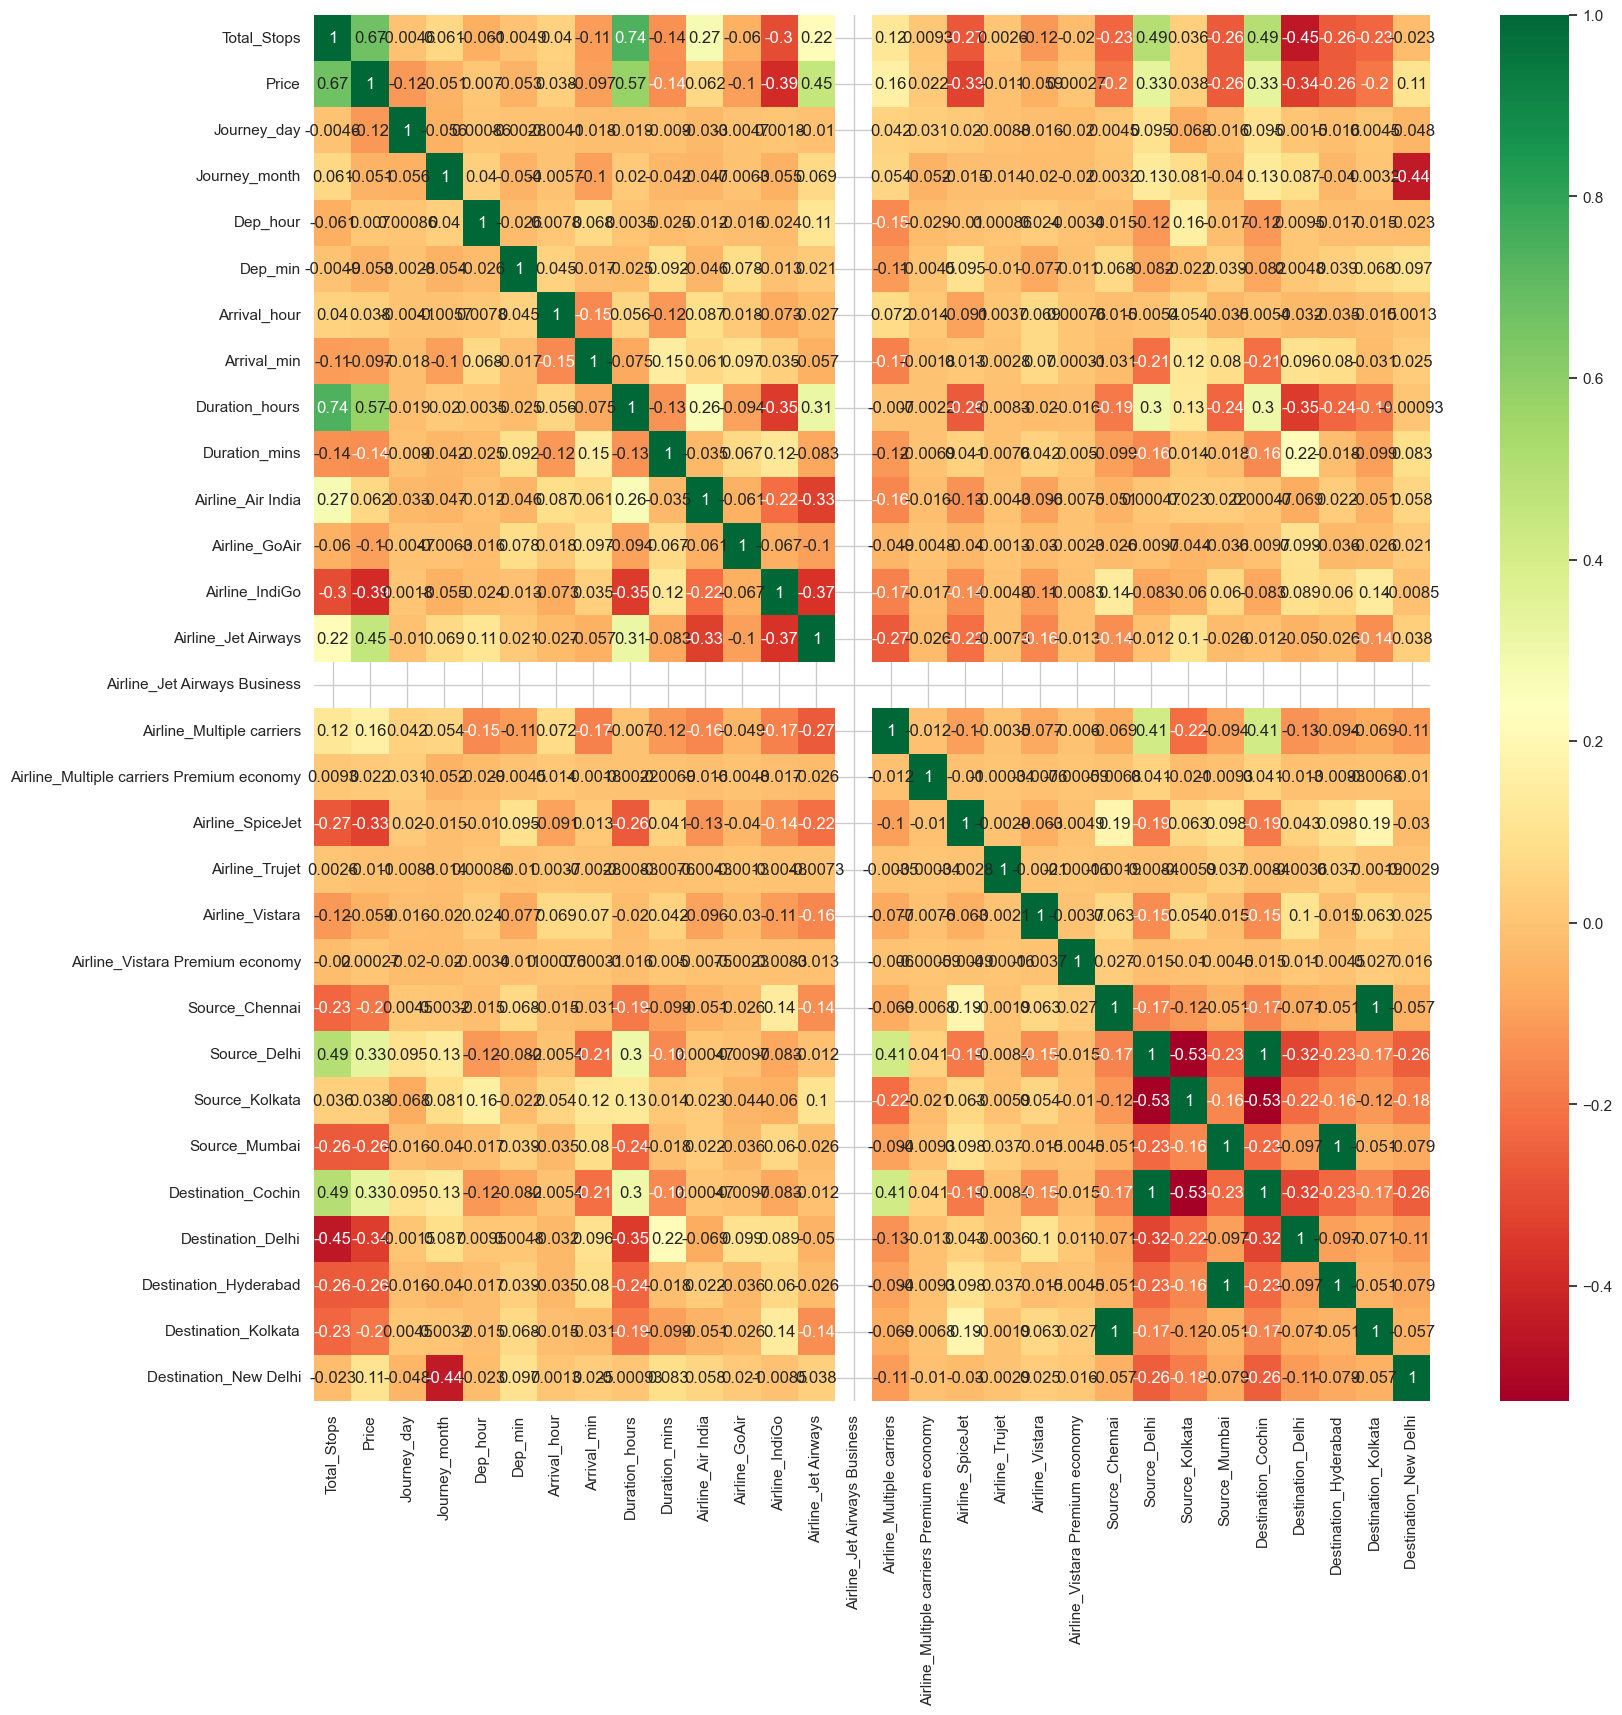

In [96]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show() 

# There is a high correlation between:
* Price & Total Stops
* Price & flight duration
* Duration & Total stops

# Building Machine Learning models


In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming x and y are defined as your features and target variable

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=2)

# Initializing the models
SR = SVR()
DT = DecisionTreeRegressor()
LR = LinearRegression()
RF = RandomForestRegressor(n_estimators=5000,min_samples_split=3)


In [98]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    MAE = mean_absolute_error(ytest, ypred)
    MSE = mean_squared_error(ytest, ypred)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(ytest, ypred)
    train_score = model.score(xtrain, ytrain)  # training score
    test_score = model.score(xtest, ytest)  # testing score
    print(f"Training Score: {train_score}")
    print("-" * 40)
    print(f"Testing Score: {test_score}")
    print("-" * 40)
    print(f'Mean Absolute Error: {MAE}')
    print("-" * 40)
    print(f'Mean Squared Error:\n{MSE}')
    print("-" * 40)
    print(f'Root Mean Squared Error:\n{RMSE}')
    print("-" * 40)
    print(f'R2_Score: {R2}')
    print("-" * 40)


In [99]:
mymodel(LR)


Training Score: 0.6510067351122203
----------------------------------------
Testing Score: 0.6300561449093783
----------------------------------------
Mean Absolute Error: 1811.6146774687686
----------------------------------------
Mean Squared Error:
5814248.594437344
----------------------------------------
Root Mean Squared Error:
2411.2753045717
----------------------------------------
R2_Score: 0.6300561449093783
----------------------------------------


In [68]:
mymodel(SR)


Training Score: 0.017347139697321712
----------------------------------------
Testing Score: 0.027402392686949772
----------------------------------------
Mean Absolute Error: 3262.3939553428977
----------------------------------------
Mean Squared Error:
15285898.639640313
----------------------------------------
Root Mean Squared Error:
3909.718485983398
----------------------------------------
R2_Score: 0.027402392686949772
----------------------------------------


In [100]:
mymodel(DT)

Training Score: 0.9615746446953766
----------------------------------------
Testing Score: 0.6980456744529338
----------------------------------------
Mean Absolute Error: 1294.2630232924141
----------------------------------------
Mean Squared Error:
4745686.37575084
----------------------------------------
Root Mean Squared Error:
2178.4596337207718
----------------------------------------
R2_Score: 0.6980456744529338
----------------------------------------


In [69]:
mymodel(RF)


Training Score: 0.9464537174517323
----------------------------------------
Testing Score: 0.8115541229360461
----------------------------------------
Mean Absolute Error: 1111.645377352169
----------------------------------------
Mean Squared Error:
2961722.8689423967
----------------------------------------
Root Mean Squared Error:
1720.9656791878206
----------------------------------------
R2_Score: 0.8115541229360461
----------------------------------------


# The Random Forest Regressor model turned out to be the most accurate one out of the 4 models.


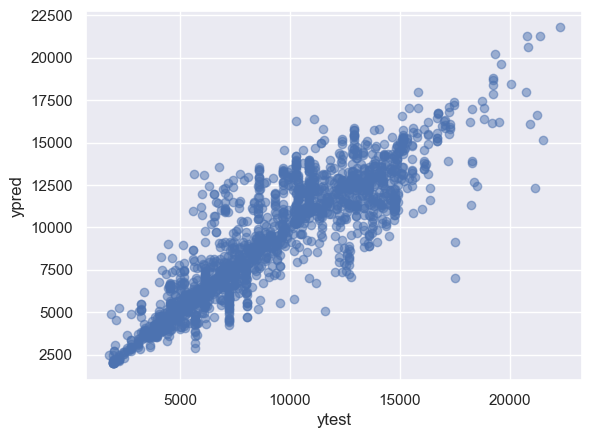

In [70]:

ypred = RF.predict(xtest)
plt.scatter(ytest, ypred, alpha = 0.5)
plt.xlabel("ytest")
plt.ylabel("ypred")
plt.show()

In [71]:
RF2=RandomForestRegressor(n_estimators=5000,max_depth=10,min_samples_leaf=300,min_samples_split=500,max_features=20,bootstrap=True)
RF2.fit(xtest,ytest)

RandomForestRegressor(max_depth=10, max_features=20, min_samples_leaf=300,
                      min_samples_split=500, n_estimators=5000)

In [72]:
predict_rf2=RF2.predict(xtest)

In [73]:
r2_score(ytest,predict_rf2)

0.5493233746033239

# Let's try to improve the performance by doing Hyperparameter tuning.

In [76]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [77]:
#Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(xtrain,ytrain)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1481; total time=   7.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1481; total time=   6.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1481; total time=   5.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1481; total time=   6.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1481; total time=   6.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1481; total time=   6.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1481; total time=   6.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estim

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1827; total time=   4.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1827; total time=   4.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1827; total time=   4.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=445; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=445; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=445; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=445; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=445; total time=   2.6s
[CV] END max_depth=15, max_fe

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ACER\anaconda3\Lib\site-packages\skl

RandomizedSearchCV(cv=10,
                   estimator=RandomForestRegressor(min_samples_split=3,
                                                   n_estimators=5000),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 272, 445, 618,
                                                         790, 963, 1136, 1309,
                                                         1481, 1654, 1827,
                                                         2000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [78]:
rf_random.best_params_


{'n_estimators': 1827,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [79]:
RF4=RandomForestRegressor(n_estimators=1827,min_samples_split=10,min_samples_leaf=2,max_features='sqrt',max_depth=15)
RF4.fit(xtest,ytest)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=1827)

In [80]:
predict_rf4=RF4.predict(xtest)

In [81]:
r2_score(ytest,predict_rf4)  #After hypertuning, the accuracy increases.


0.8414728668142322

For Random Forest Regressor,

Before hyper tuning, R2 score = 81.15 %
After hyper tuning, R2 score = 84.14 %
The value of MAE drops as well, indicating that we are successful in tunning our model.



# Conclusion
We have used random forest regressor for training the model and improved its accuracy by doing hyperparameter tuning. As a result, we have trained our Random Forest Regression model, to forecast fares of flight tickets, with an R2 score of 84.14 %.